In [25]:
from script_new import *

In [3]:
facebook = pd.read_csv('facebook.csv')
del facebook['Unnamed: 0']
facebook.columns= ['company','location','job-title','overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars','helpful_count','year']
fields = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
summary_facebook = facebook[fields].describe().transpose()

In [4]:
summary_facebook

,count,mean,std,min,25%,50%,75%,max
overall_ratings,984.0,4.506098,0.963190,1.0,4.0,5.0,5.0,5.0
work_balance_stars,984.0,3.877744,1.174726,1.0,3.0,4.0,5.0,5.0
culture_values_stars,984.0,4.470020,0.968405,1.0,4.5,5.0,5.0,5.0
carrer_opportunities_stars,984.0,4.390142,0.972477,1.0,4.0,5.0,5.0,5.0
comp_benefit_stars,984.0,4.602439,0.680086,1.0,4.0,5.0,5.0,5.0
senior_mangemnet_stars,984.0,4.269614,1.071247,1.0,4.0,5.0,5.0,5.0


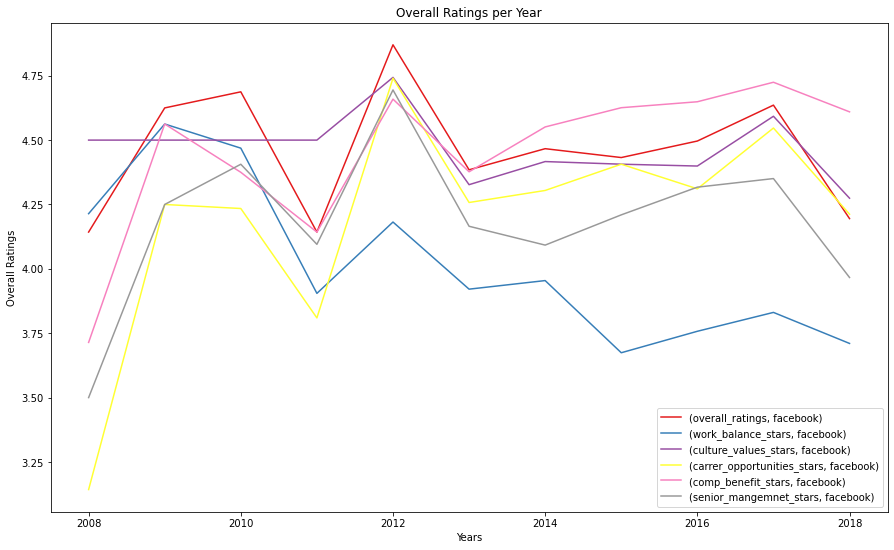

In [5]:
#Ratings over time for Facebook
fig, ax = plt.subplots(figsize=(15,9))
keys = ['year','company']
lines = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
facebook.groupby(keys)[lines].mean().unstack().plot(ax=ax,colormap = 'Set1')
_ = plt.xlabel("Years")
_ = plt.ylabel("Overall Ratings")
_ = plt.title("Overall Ratings per Year")
_ = plt.legend()

In [6]:
corr_fb = corr_matrix(facebook)
corr_fb

,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,Job_code,Locations_code
overall_ratings,1.000000,0.604796,0.778088,0.780238,0.441339,0.772309,-0.206851,-0.268972,-0.063440
work_balance_stars,0.604796,1.000000,0.563945,0.525804,0.350925,0.599682,-0.158623,-0.216609,-0.001668
culture_values_stars,0.778088,0.563945,1.000000,0.690051,0.370360,0.707765,-0.169488,-0.240149,-0.049880
carrer_opportunities_stars,0.780238,0.525804,0.690051,1.000000,0.517276,0.695116,-0.177462,-0.207805,-0.063515
comp_benefit_stars,0.441339,0.350925,0.370360,0.517276,1.000000,0.476689,-0.074236,-0.071012,-0.116213
senior_mangemnet_stars,0.772309,0.599682,0.707765,0.695116,0.476689,1.000000,-0.159814,-0.261915,-0.049443
helpful_count,-0.206851,-0.158623,-0.169488,-0.177462,-0.074236,-0.159814,1.000000,0.049493,-0.001566
Job_code,-0.268972,-0.216609,-0.240149,-0.207805,-0.071012,-0.261915,0.049493,1.000000,-0.002573
Locations_code,-0.063440,-0.001668,-0.049880,-0.063515,-0.116213,-0.049443,-0.001566,-0.002573,1.000000


#### Probabilistic and graphical models

In [7]:
df_train_fb = get_train_df(facebook)
df_train_fb.head()

,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars
583,2,1,3,5,1
780,3,4,4,4,3
1,5,5,5,5,5
508,4,4,5,5,5
801,5,5,5,5,5


In order to have an idea of the causal relationships between the variables, we are going to use an heuristic algorithm called HIllClimSearch. This algorithm aims to generate a **bayesian network**. Bayesian networks are directed acyclic graph which have the feature that a specific variable depends only on the descendants (parents nodes and children nodes). 

Bayesian networks are the main used tool in modelling causality relationships among variables, provided that their are directed and make easier the computation given their assumption.

HillClimbSearch() uses a mathematical optimization technique which belongs to the family of local search. It is an iterative algorithm that starts with an arbitrary solution to a problem, then attempts to find a better solution by making an incremental change to the solution. If the change produces a better solution, another incremental change is made to the new solution, and so on until no further improvements can be found. 

  0%|          | 5/1000000 [00:00<9:02:43, 30.71it/s] 



[('carrer_opportunities_stars', 'senior_mangemnet_stars'), ('comp_benefit_stars', 'carrer_opportunities_stars'), ('comp_benefit_stars', 'senior_mangemnet_stars'), ('senior_mangemnet_stars', 'culture_values_stars'), ('senior_mangemnet_stars', 'work_balance_stars')]


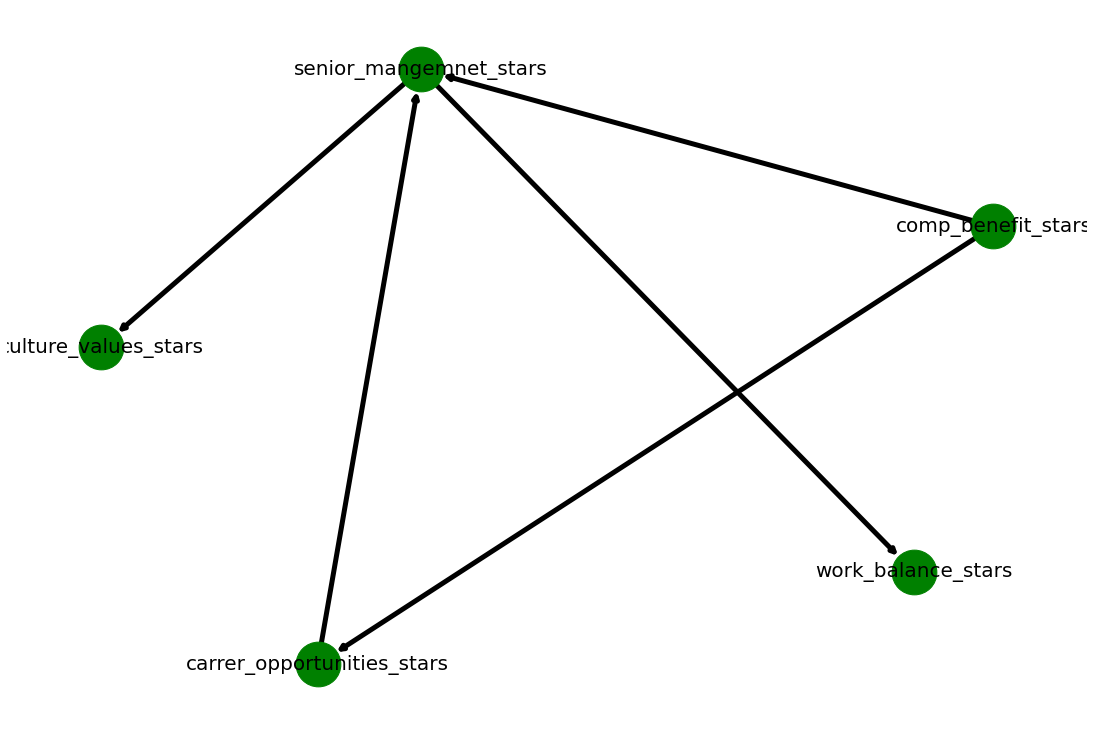

In [9]:
hc = HillClimbSearch(df_train_fb, scoring_method=K2Score(df_train_fb))  #use the training set to build the model
#The score to be optimized during structure estimation.  
#  Supported structure scores: k2score, bdeuscore, bicscore.
best_model = hc.estimate()
print(best_model)
edges = list(best_model.edges())
print(edges)
model = BayesianModel(edges)

%matplotlib inline
plt.figure(figsize=(15,10))

nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000,
        node_color="green", width = 5, font_size = 20)
plt.show()

Here after having fitted the bayesian model with the data, we are going to use variable elimination method to make inference on the  data. 

The concept of variable elimination is to eliminate one variable at a time from the marginal distribution expression. 

In each step below, we create a new factor $τ$ in representing the marginalized factors. 

$τ(a, b, c)$ represents the intermediate factor that depends on a, b, and c only. then the new factor is substituted in the original expression.

In [10]:
model.fit(df_train_fb, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

In [11]:
#focus on the relation between culture_values_stars and work_balance
print(infer.query(variables=['work_balance_stars', 'senior_mangemnet_stars'], joint= True))

Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 563.45it/s]

+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars    | senior_mangemnet_stars    |   phi(work_balance_stars,senior_mangemnet_stars) |
+=======================+===========================+==================================================+
| work_balance_stars(1) | senior_mangemnet_stars(1) |                                           0.0304 |
+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars(1) | senior_mangemnet_stars(2) |                                           0.0203 |
+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars(1) | senior_mangemnet_stars(3) |                                           0.0034 |
+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars(1) | senior_mangemnet_stars(4) |  

In [12]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'senior_mangemnet_stars': i}))


Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars:   0%|          | 0/3 [00:00<?, ?it/s]        

Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 668.81it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]


  0%|          | 0/3 [00:00<?, ?it/s]


Eliminating: carrer_opportunities_stars:   0%|          | 0/3 [00:00<?, ?it/s]


Eliminating: comp_benefit_stars:   0%|          | 0/3 [00:00<?, ?it/s]        


Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 649.68it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars:   0%|          | 0/3 [00:00<?, ?it/

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6429 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2143 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.0000 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0714 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0714 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.4615 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

In [13]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'senior_mangemnet_stars': i}))




  0%|          | 0/3 [00:00<?, ?it/s]


Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]



  0%|          | 0/3 [00:00<?, ?it/s]



Eliminating: carrer_opportunities_stars:   0%|          | 0/3 [00:00<?, ?it/s]



Eliminating: comp_benefit_stars:   0%|          | 0/3 [00:00<?, ?it/s]        



Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 683.63it/s]




  0%|          | 0/3 [00:00<?, ?it/s]



Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]




  0%|          | 0/3 [00:00<?, ?it/s]




Eliminating: carrer_opportunities_stars:   0%|          | 0/3 [00:00<?, ?it/s]




Eliminating: comp_benefit_stars:   0%|          | 0/3 [00:00<?, ?it/s]        




Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 514.30it/s]





  0%|          | 0/3 [00:00<?, ?it/s]




Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]





  0%|          | 0/3 [00:00<?, ?it/s]





Eliminating: carrer_opportunitie

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6429 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2143 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.0000 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0714 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0714 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.4615 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

In [14]:
causal_graph_facebook = """
digraph {
work_balance_stars;
carrer_opportunities_stars;
comp_benefit_stars;
senior_mangemnet_stars;
carrer_opportunities_stars -> comp_benefit_stars; 
carrer_opportunities_stars -> senior_mangemnet_stars; 

culture_values_stars -> senior_mangemnet_stars;


senior_mangemnet_stars -> work_balance_stars;

}
"""

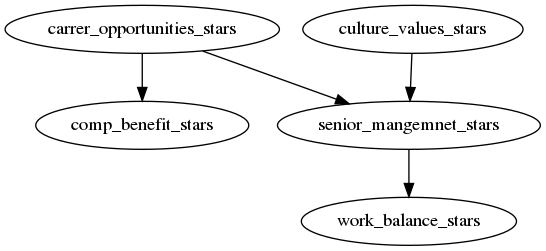

In [19]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='senior_mangemnet_stars'

model_fb= CausalModel(
        data = df_train_fb,
        graph=causal_graph_facebook.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_fb.view_model()
display(Image(filename='causal_model.png'))

In [20]:
estimands = model_fb.identify_effect()

In [21]:
estimate = model_fb.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                
─────────────────────────(Expectation(work_balance_stars|comp_benefit_stars))
d[senior_mangemnet_stars]                                                    
Estimand assumption 1, Unconfoundedness: If U→{senior_mangemnet_stars} and U→work_balance_stars then P(work_balance_stars|senior_mangemnet_stars,comp_benefit_stars,U) = P(work_balance_stars|senior_mangemnet_stars,comp_benefit_stars)

## Realized estimand
b: work_balance_stars~senior_mangemnet_stars+comp_benefit_stars
Target units: ate

## Estimate
Mean value: 0.6493790424882149
p-value: [3.94818316e-23]
95.0% confidence interval: [[0.53110704 0.76765104]]



In [26]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel(mode,model_fb,estimands,estimate)

Refute: Add a Random Common Cause
Estimated effect:0.6493790424882149
New effect:0.6519356417642748

Refute: Use a subset of data
Estimated effect:0.6493790424882149
New effect:0.6424595319427507
p value:0.42000000000000004

Refute: Use a Placebo Treatment
Estimated effect:0.6493790424882149
New effect:0.007612245671044344
p value:0.46

